In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In this lesson we will discuss modeling mathematical modeling and computer simulation.

We'll do a little bit of theory and then you can do some coding!

# Newton's Second Law
***

This is probably the most important rule in all of physics. It is written as

$$\textrm{Force = Mass x Acceleration}$$

or in mathematical terms:

$$F = ma$$

This seemingly simple equation is the basis for how robots, our bodies, and just about everything we can see moves. In this lesson, we will unravel some of the details of Newton's second law, and see how it can be used in simulations.

To understand how Newton's law leads to equations of motion, we must first understand the relationships between position, velocity, and acceleration. 

* *velocity* is the rate of change of position
* *acceleration* is the rate of change of acceleration

So, Newton's law implies that if you apply a force to an object, this causes an acceleration, which makes it move faster. 

Now we will examine the simplest relationship in detail. 

# Velocity and Position
***

The position and velocity will typically be functions of time $p(t)$ and $v(t)$. 

The *average velocity* (over some time period) is defined as 
$$
v_{\textrm{ave}} = \frac{\textrm{Change in position}}{\textrm{Change in time}}
$$

In more mathematical terms, at any two points in time $t_0$ and $t_1$, the position, $p$, satisfies

$$
\frac{p(t_1)-p(t_0)}{t_1-t_0} = v_{\textrm{ave}}
$$

If the time interval $[t_0,t_1]$ is very small, then the velocity cannot change very much in the interval, and so $v(t_0) \approx v_{\textrm{ave}}$, i.e. the values are very close.

This leads to the approximate equality

$$
\frac{p(t_1)-p(t_0)}{t_1-t_0} \approx v(t_0)
$$


which can be rearranged to give

$$p(t_1) \approx p(t_0) + v(t_0) \cdot (t_1 - t_0)$$

This expression is well-suited for programming: Say that the current time $t=t_0$ and that $t_1 = t+dt$ for some small
number $dt$. Given the current position $p(t)$ and current velocity $v(t)$, the expression gives us a way to approximate the value of the position at time in the near future:

$$p(t+dt) \approx p(t) + v(t) \cdot dt $$

The small number $dt$ is called the *time step size*

## Problem 1
***
Write a function that takes a current position, a current velocity, and a time step, $dt$ and returns the new position after a time step of size $dt$. 

In [18]:
def change_of_position(p,v,dt):
    """
    Given:
    current position p (at time t)
    current velocity v (at time t)
    compute the position at time t+dt
    """
    ### BEGIN SOLUTION
    return p + v * dt
    ### END SOLUTION

We can test this code by putting it into a loop.

In [19]:
t = 0
p = 0
v = 2

dt = 0.1
while t <= 1:
    print 'time: %.1f\tposition: %.1f\tvelocity: %.1f' % (t,p,v)
    t = t+dt
    p = change_of_position(p,v,dt)

time: 0.0	position: 0.0	velocity: 2.0
time: 0.1	position: 0.2	velocity: 2.0
time: 0.2	position: 0.4	velocity: 2.0
time: 0.3	position: 0.6	velocity: 2.0
time: 0.4	position: 0.8	velocity: 2.0
time: 0.5	position: 1.0	velocity: 2.0
time: 0.6	position: 1.2	velocity: 2.0
time: 0.7	position: 1.4	velocity: 2.0
time: 0.8	position: 1.6	velocity: 2.0
time: 0.9	position: 1.8	velocity: 2.0
time: 1.0	position: 2.0	velocity: 2.0


We should see the position increase from 0 to 2, while the velocity should stay constant.


# Velocity and Acceleration
***
Now we will focus on the relationship between velocity and acceleration. Mathematically, acceleration specifies changes in velocity in the same way that velocity specifies changes in position. 

Rather than going through a derivation, we will just focus on how we would use acceleration to compute velocities in a program. Given the current velocity $v(t)$, the current acceleration $a(t)$, and a small time step size, $dt$, the velocity at time $t+dt$ is given (approximately) by:
$$v(t+dt) \approx v(t) + a(t) \cdot dt $$

## Problem 2
***
Write a function that gives the new velocity when given the current velocity, the current acceleration, and a time step size.

In [20]:
def change_of_velocity(v,a,dt):
    """
    Given:
    current velocity v (at time t)
    current acceleration a (at time t)
    compute the velocity at time t+dt
    """
    ### BEGIN SOLUTION
    return v + a * dt
    ### END SOLUTION

Now we check it by putting the code into a loop

time: 0.0	position: 0.0	velocity: 0.0	acceleration: 2.0
time: 0.1	position: 0.0	velocity: 0.2	acceleration: 2.0
time: 0.2	position: 0.0	velocity: 0.4	acceleration: 2.0
time: 0.3	position: 0.1	velocity: 0.6	acceleration: 2.0
time: 0.4	position: 0.1	velocity: 0.8	acceleration: 2.0
time: 0.5	position: 0.2	velocity: 1.0	acceleration: 2.0
time: 0.6	position: 0.3	velocity: 1.2	acceleration: 2.0
time: 0.7	position: 0.4	velocity: 1.4	acceleration: 2.0
time: 0.8	position: 0.6	velocity: 1.6	acceleration: 2.0
time: 0.9	position: 0.7	velocity: 1.8	acceleration: 2.0
time: 1.0	position: 0.9	velocity: 2.0	acceleration: 2.0
time: 1.1	position: 1.1	velocity: 2.2	acceleration: 2.0
time: 1.2	position: 1.3	velocity: 2.4	acceleration: 2.0
time: 1.3	position: 1.6	velocity: 2.6	acceleration: 2.0
time: 1.4	position: 1.8	velocity: 2.8	acceleration: 2.0
time: 1.5	position: 2.1	velocity: 3.0	acceleration: 2.0
time: 1.6	position: 2.4	velocity: 3.2	acceleration: 2.0
time: 1.7	position: 2.7	velocity: 3.4	accelerati

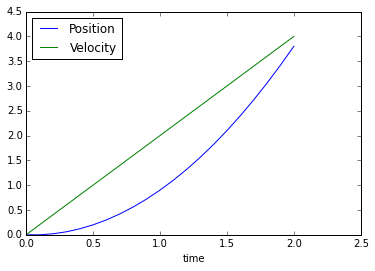

In [37]:
t = 0
p = 0
v = 0
a = 2

T = [t]; P = [p]; V = [v]

dt = 0.1
while t <= 2:
    print 'time: %.1f\tposition: %.1f\tvelocity: %.1f\tacceleration: %.1f' % (t,p,v,a)
    t = t+dt
    new_p = change_of_position(p,v,dt)
    new_v = change_of_velocity(v,a,dt)
    v = new_v
    p = new_p
    T.append(t); P.append(p); V.append(v)
    
linep, = plt.plot(T,P)
linev, = plt.plot(T,V)
plt.legend((linep,linev),('Position','Velocity'),'best')
plt.xlabel('time')

Now we should see that the velocity increases linearly, while the position increases like a parabola.

# Forces
***
For the movement of an object, we cannot control position and velocity directly. Instead, we can influence position and velocity by applying forces, which change acceleration, and thus velocity and position. 

In a later lesson, we will explore good rules for applying forces. For now, we will just examine the behavior caused by a sequence of forces.

Newton's second law implies that at any time $F(t)=ma(t)$. Thus, given the current force $F(t)$, the acceleration can be computed as
$$
a(t) = F(t) / m
$$

## Problem 3
***
Use your `change_of_position` and `change_of_velocity` to write a function that computes new values for position and velocity, given their current values, the current force, the mass, and the time step size. 

Hint: To return two values `new_p` and `new_v`, the variables are separated by a comma: `return new_p, new_v`

In [38]:
def change_of_position_and_velocity(p,v,F,m,dt):
    """
    Given:
        Current position p
        Current velocity v
        Current Force F
        Mass of the object m
        time step size dt
    
    Calculate new_p and new_v the position and velocity after time step dt
    return new_p, new_v
    """
    ### BEGIN SOLUTION
    a = F / m
    new_p = change_of_position(p,v,dt)
    new_v = change_of_velocity(v,a,dt)
    return new_p, new_v
    ### END SOLUTION

Now we can test the code with a simulation

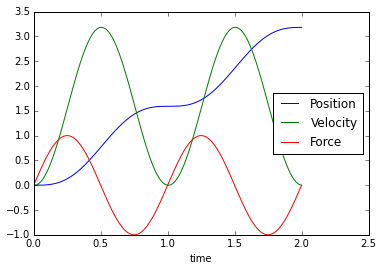

In [48]:
t = 0
p = 0
v = 0
f = 0

T = [t]; P = [p]; V = [v]; F = [f]

dt = 0.01
m = 0.1

while t < 2:
    t = t + dt
    p,v = change_of_position_and_velocity(p,v,f,m,dt)
    f =  np.sin(2 * np.pi * t)
    T.append(t); P.append(p); V.append(v); F.append(f)
    
linep, = plt.plot(T,P)
linev, = plt.plot(T,V)
linef, = plt.plot(T,F)
plt.legend((linep,linev,linef),('Position','Velocity','Force'),'best')
plt.xlabel('time')

# HOORAH!
Another lesson done.